ADAM minimum at x = 3.000000
SGD  minimum at x = 3.000000


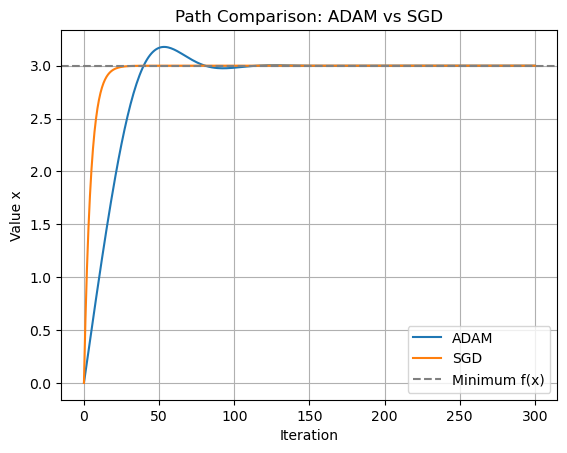

In [15]:
# Difference between ADAM and SGD optimalization methods for simply function

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 3) ** 2

# Derivative of f(x)
def grad_f(x):
    return 2 * (x-3)


# ADAM Optimizer (from Scratch)
def adam_optimize(f, grad_f, x0, learn_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, steps=300):
    x = x0
    m = 0
    v = 0
    path = [x0]

    for i in range(1, steps+1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g # MOMENTUM - weighted average of past gradients
        v = beta2 * v + (1 - beta2) * (g**2) # RMSProp - average of squares of past gradients

        # Bias correction
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        # Parameter update
        x = x - learn_rate * m_hat / (np.sqrt(v_hat) + epsilon) # epsilon – small value to prevent division by zero
        path.append(x)
    return x, path


# Stochastic Gradient Descent Optimizer
def sgd_optimize(f, grad_f, x0, learn_rate=0.1, steps=300):
    x = x0
    path = [x0]

    for _ in range(steps):
        g = grad_f(x)
        x = x - learn_rate * g
        path.append(x)
    return x, path

# Test and Visualization
x_start = 0 # wrong starting place to see the differences better

# Running both methods
x_adam, path_adam = adam_optimize(f, grad_f, x_start)
x_sgd, path_sgd = sgd_optimize(f, grad_f, x_start)

# Results
print(f"ADAM minimum at x = {x_adam:.6f}")
print(f"SGD  minimum at x = {x_sgd:.6f}")

# Plot of ADAM and SGD
plt.plot(path_adam, label="ADAM")
plt.plot(path_sgd, label="SGD")
plt.axhline(y=3, color='gray', linestyle='--', label='Minimum f(x)')
plt.title("Path Comparison: ADAM vs SGD")
plt.xlabel("Iteration")
plt.ylabel("Value x")
plt.legend()
plt.grid(True)
plt.show()  